In [ ]:
#avoid to print any warning
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#uploading CSV file with large number of rows
from google.colab import files
uploaded = files.upload()

Saving COCA COLA.csv to COCA COLA.csv


In [ ]:
#The important header files
import numpy as np                 #for matrix calculation
import pandas as pd                #for Dataframe manipulation
import matplotlib.pyplot as plt    #for basic visualization
import seaborn as sns              #for visualization better than matplotlib
import plotly.express as px        #for advance visualiation

In [ ]:

data = pd.read_csv('/content/COCA COLA.csv')  #uploading csv file in pandas
data.head()                                   #display of first 5 rows in dataframe

,Date,Open,High,Low,Close,Adj Close,Volume
0,1962-01-02,0.263021,0.270182,0.263021,0.263021,0.051133,806400
1,1962-01-03,0.259115,0.259115,0.253255,0.257161,0.049994,1574400
2,1962-01-04,0.257813,0.261068,0.257813,0.259115,0.050374,844800
3,1962-01-05,0.259115,0.262370,0.252604,0.253255,0.049234,1420800
4,1962-01-08,0.251302,0.251302,0.245768,0.250651,0.048728,2035200


###A.1) What is the trend of Coca-Cola stock price over the period b/w **19 Jan 1962** and **19 Dec 2021**?


In [ ]:
#ploting line gragh using plotly
fig = px.line(data, x="Date", y="Adj Close", title='Trend of stock price or the years')
fig.show()

###Comment:
The graph shows **upword trend** in the long run.

###A.2)Does the time series fit into **additive** or **multiplicative** model?

In [ ]:
data['Month'] = data['Date'].apply(lambda x: x.split('-')[1]) #spliting the month number from date column
data['Year'] = data['Date'].apply(lambda x: x.split('-')[0])  #spliting the year number from date column
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Month,Year
0,1962-01-02,0.263021,0.270182,0.263021,0.263021,0.051133,806400,01,1962
1,1962-01-03,0.259115,0.259115,0.253255,0.257161,0.049994,1574400,01,1962
2,1962-01-04,0.257813,0.261068,0.257813,0.259115,0.050374,844800,01,1962
3,1962-01-05,0.259115,0.262370,0.252604,0.253255,0.049234,1420800,01,1962
4,1962-01-08,0.251302,0.251302,0.245768,0.250651,0.048728,2035200,01,1962


In [ ]:
#checking the datatype of each column for correct arithmatic calculation
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15096 entries, 0 to 15095
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       15096 non-null  object 
 1   Open       15096 non-null  float64
 2   High       15096 non-null  float64
 3   Low        15096 non-null  float64
 4   Close      15096 non-null  float64
 5   Adj Close  15096 non-null  float64
 6   Volume     15096 non-null  int64  
 7   Month      15096 non-null  object 
 8   Year       15096 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 1.0+ MB


In [ ]:
#converting object type to integer type data
data['Month'] = data['Month'].astype(int)
data['Year'] = data['Year'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15096 entries, 0 to 15095
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       15096 non-null  object 
 1   Open       15096 non-null  float64
 2   High       15096 non-null  float64
 3   Low        15096 non-null  float64
 4   Close      15096 non-null  float64
 5   Adj Close  15096 non-null  float64
 6   Volume     15096 non-null  int64  
 7   Month      15096 non-null  int64  
 8   Year       15096 non-null  int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 1.0+ MB


In [ ]:
#ploting month wise trend over the years for all 12 months
fig1 = px.line(data, x="Date", y="Adj Close", title='Trend of each month over the years', color = 'Month')
fig1.show()

###Comment:
As we can see the all 12 lines are following quite a same path in similar manner i.e., gradient is not changing, we can conclude that it will go in **Additive model**.

###A.3) Draw the lag_plot. Point out the obervations.

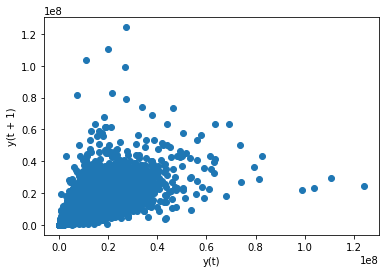

In [ ]:
#drawing lag_plot
from pandas.plotting import lag_plot

series = pd.read_csv('/content/COCA COLA.csv', index_col=0)
lag_plot(series)
plt.show()

###Comment:
1. We can see the **+ve correlation** (not so strong)
2. There are some **outliers exist**, it may be due to drastic fall in covid and some other economics crises in between.
3. We can observe some **randomness at higher values**.
4. An **elliptical plot** suggests that the data comes from a **8single-cycle sinusoidal model**.
5. In this graph it's difficult to tell about seasonality.






###A.4) Does the Coca-Cola stock price follows stationary? Explain.<br> A.5) Check for seasonality and cyclicity.

<Figure size 432x288 with 0 Axes>

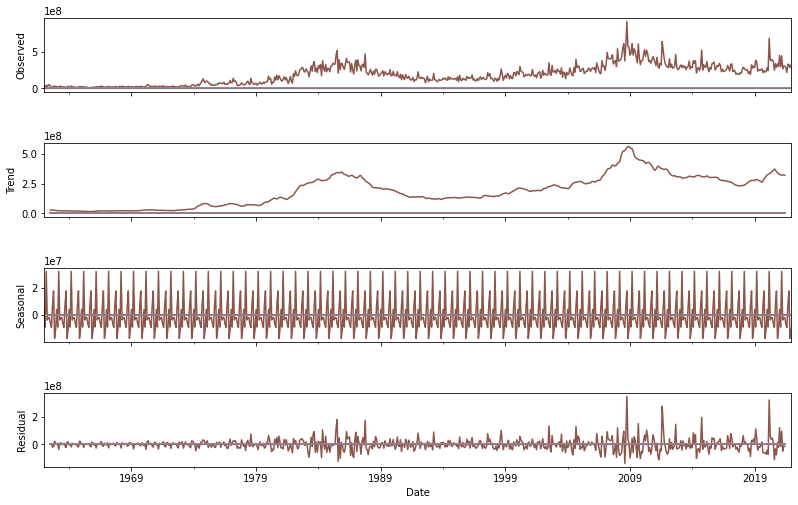

In [ ]:
#Time series data structure 
from statsmodels.tsa.seasonal import seasonal_decompose

data['Date'] = pd.to_datetime(data['Date']) #change datatype object to datetime
data.set_index('Date',inplace = True)       #set index as datetime

#decompose of time series data
decompose  = seasonal_decompose(data.resample('M').sum(),freq=12)
fig2 = plt.figure()
fig2 = decompose.plot()
fig2.set_size_inches(12,8)

###Comment:
In the 2nd subplot, Trend shows that graph doesn't follow 
**Stationary**.
<br>
<br>
In the 3rd subplot, **Seasonality is clearly visible**.<br> In the 4th subplot, we can clearly see **random fluctuations**. Therefore **no cyclicity** exist.

###A.6) Calculate the mean and variance to varify stationary for both Month and Year wise trend. Comment on observation.


To check Stationary 


comparison between mean and Variance

mean1 = 6.511261 ,mean2 = 6.536566
var1 = 11.812381 ,var2 = 11.736439


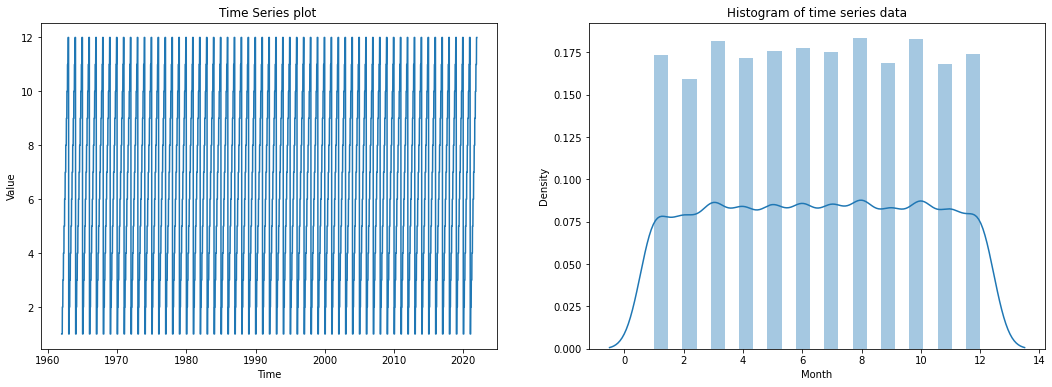

In [ ]:
#Time series stationary check
split = round(len(data['Month'])/2) # split two part of time series data 
X1,X2 = data['Month'][0:split],data['Month'][split:]
mean1 ,mean2 = X1.mean() , X2.mean()
var1,var2 = X1.var() , X2.var()
print("\033[1m" + "\nTo check Stationary \n" +  "\033[0m")
print("\ncomparison between mean and Variance\n")
print("mean1 = %f ,mean2 = %f" %(mean1,mean2))
print("var1 = %f ,var2 = %f" %(var1,var2))
fig ,ax = plt.subplots(1,2,figsize = (18,6))

plt.title("Histogram of time series data")
ax[0].plot(data['Month'])
ax[0].set_xlabel("Time")
ax[0].set_ylabel("Value")
ax[0].set_title("Time Series plot ")
sns.distplot(data['Month'],ax =ax[1])
plt.show()

###Comment:
As mean1 and var1 are quite similar to mean2 and var2 respectively, the trend **is stationary** on the basis of month.


To check Stationary 


Before difference mean and Variance

mean1 = 1976.544118 ,mean2 = 2006.475490
var1 = 74.928357 ,var2 = 74.855766


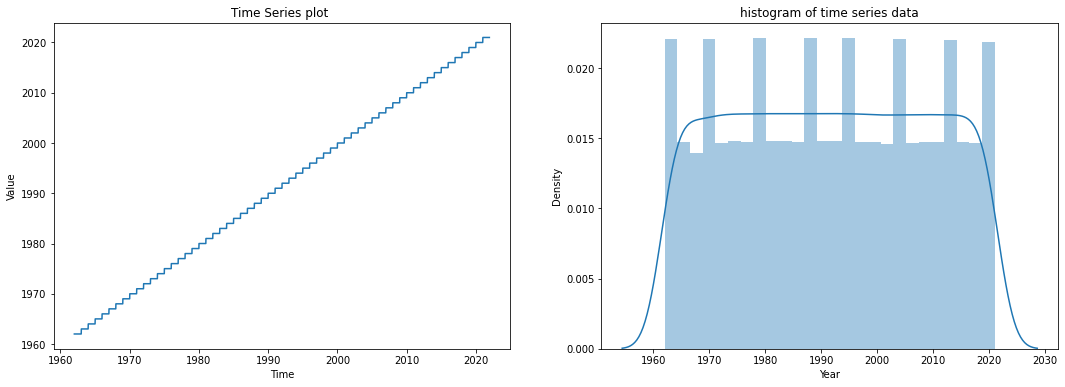

In [ ]:
#Time series stationary check
split = round(len(data['Year'])/2) # split two part of time series data 
X1,X2 = data['Year'][0:split],data['Year'][split:]
mean1 ,mean2 = X1.mean() , X2.mean()
var1,var2 = X1.var() , X2.var()
print("\033[1m" + "\nTo check Stationary \n" +  "\033[0m")
print("\nBefore difference mean and Variance\n")
print("mean1 = %f ,mean2 = %f" %(mean1,mean2))
print("var1 = %f ,var2 = %f" %(var1,var2))
fig ,ax = plt.subplots(1,2,figsize = (18,6))

plt.title("Histogram of time series data")
ax[0].plot(data['Year'])
ax[0].set_xlabel("Time")
ax[0].set_ylabel("Value")
ax[0].set_title("Time Series plot ")
sns.distplot(data['Year'],ax =ax[1])
plt.show()

###Comment:
As mean1 and var1 are not similar to mean2 and var2 respectively, the trend is **not stationary** over the years.